# 

In [183]:
from itertools import combinations
import math

import tskit
import msprime
import numpy as np

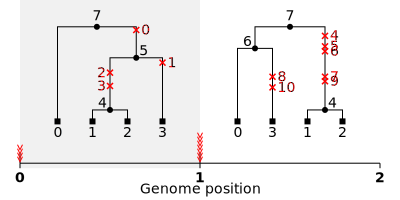

In [159]:
msprime.sim_mutations(ts, 0.0004).draw_svg()

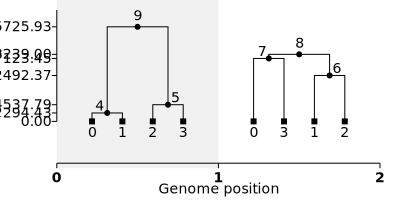

In [161]:
ts.draw_svg(y_axis=True, y_label=" ")

In [230]:
from itertools import product

In [362]:
def combine(samples):
    ij = list(combinations(samples, 2))
    ijk = [(i, j, k) for i, j, k in product(samples, repeat=3)
           if i != k and i != j and j != k]
    ijkl = [(i, j, k, l) for i, j in combinations(samples, 2)
            for k in range(len(samples))
            for l in range(k + 1, len(samples))
            if i != k and j != k and l != i and l != j]
    return ij, ijk, ijkl

In [257]:
ts.samples()

array([0, 1, 2, 3], dtype=int32)

In [267]:
def new_combine(num_samples):
    j_start = 1

    all_samps = set(range(num_samples))
    for i in range(num_samples - 1):
        for j in range(j_start, num_samples):
            for k, l in combinations(sorted(all_samps - {i, j}), 2):
                yield i, j, k, l
        j_start += 1

In [272]:
sorted(combine(list(range(9)))[2]) == sorted(new_combine(9))

True

In [250]:
ijkl

[(0, 1, 2, 3),
 (0, 2, 1, 3),
 (0, 3, 1, 2),
 (1, 2, 0, 3),
 (1, 3, 0, 2),
 (2, 3, 0, 1)]

In [248]:
ijkl

[(0, 1, 2, 3),
 (0, 2, 1, 3),
 (0, 3, 1, 2),
 (1, 2, 0, 3),
 (1, 3, 0, 2),
 (2, 3, 0, 1)]

In [360]:
def combine2(n):
    # rest = [None] * (n - 2)
    rest = [None] * n
    n_rest = n - 2
    for idx in range(n_rest):
        rest[idx] = idx + 2
    for len_ivl in range(1, n):
        i = 0
        j = len_ivl
        for ivl_idx in range(n - len_ivl): 
            inner = 0
            ff = 0
            for fff in range(n):
                if fff != i and fff != j:
                    rest[ff] = fff
                    ff += 1
            for k in range(n_rest):
                for l in range(inner + 1, n_rest):
                    yield i, j, rest[k], rest[l]
                    # print(i, j, rest[k], rest[l])
                inner += 1
            i += 1
            j += 1
            rest[ivl_idx] = i
            if len_ivl > 1:
                rest[ivl_idx + len_ivl] = j
            # print(rest)

In [361]:
[(i, j, i == j) for i, j in zip(sorted(combine(list(range(6)))[2]), sorted(combine2(6)))]

[((0, 1, 2, 3), (0, 1, 2, 3), True),
 ((0, 1, 2, 4), (0, 1, 2, 4), True),
 ((0, 1, 2, 5), (0, 1, 2, 5), True),
 ((0, 1, 3, 4), (0, 1, 3, 4), True),
 ((0, 1, 3, 5), (0, 1, 3, 5), True),
 ((0, 1, 4, 5), (0, 1, 4, 5), True),
 ((0, 2, 1, 3), (0, 2, 1, 3), True),
 ((0, 2, 1, 4), (0, 2, 1, 4), True),
 ((0, 2, 1, 5), (0, 2, 1, 5), True),
 ((0, 2, 3, 4), (0, 2, 3, 4), True),
 ((0, 2, 3, 5), (0, 2, 3, 5), True),
 ((0, 2, 4, 5), (0, 2, 4, 5), True),
 ((0, 3, 1, 2), (0, 3, 1, 2), True),
 ((0, 3, 1, 4), (0, 3, 1, 4), True),
 ((0, 3, 1, 5), (0, 3, 1, 5), True),
 ((0, 3, 2, 4), (0, 3, 2, 4), True),
 ((0, 3, 2, 5), (0, 3, 2, 5), True),
 ((0, 3, 4, 5), (0, 3, 4, 5), True),
 ((0, 4, 1, 2), (0, 4, 1, 2), True),
 ((0, 4, 1, 3), (0, 4, 1, 3), True),
 ((0, 4, 1, 5), (0, 4, 1, 5), True),
 ((0, 4, 2, 3), (0, 4, 2, 3), True),
 ((0, 4, 2, 5), (0, 4, 2, 5), True),
 ((0, 4, 3, 5), (0, 4, 3, 5), True),
 ((0, 5, 1, 2), (0, 5, 1, 2), True),
 ((0, 5, 1, 3), (0, 5, 1, 3), True),
 ((0, 5, 1, 4), (0, 5, 1, 4), True),
 

In [346]:
sorted(combine2(5))

0 1 2 3
0 1 2 4
0 1 3 4
[1, 3, 4, None, None]
1 2 0 3
1 2 0 4
1 2 3 4
[0, 2, 4, None, None]
2 3 0 1
2 3 0 4
2 3 1 4
[0, 1, 3, None, None]
3 4 0 1
3 4 0 2
3 4 1 2
[0, 1, 2, 4, None]
0 2 1 3
0 2 1 4
0 2 3 4
[1, 3, 3, 4, None]
1 3 0 2
1 3 0 4
1 3 2 4
[0, 2, 4, 4, None]
2 4 0 1
2 4 0 3
2 4 1 3
[0, 1, 3, 4, None]
0 3 1 2
0 3 1 4
0 3 2 4
[1, 2, 4, 4, None]
1 4 0 2
1 4 0 3
1 4 2 3
[0, 2, 3, 4, None]
0 4 1 2
0 4 1 3
0 4 2 3
[1, 2, 3, 4, None]


TypeError: 'NoneType' object is not iterable

In [371]:
def compute_D2(ts, x, y, ij, ijk, ijkl, norm=False, mu=None):
    E_ijij = np.mean([x.tmrca(i, j) * y.tmrca(i, j) for i, j in ij]) 
    E_ijik = np.mean([x.tmrca(i, j) * y.tmrca(i, k) for i, j, k in ijk])
    E_ijkl = np.mean([x.tmrca(i, j) * y.tmrca(k, l) for i, j, k, l in ijkl])
    D2 = E_ijij - 2 * E_ijik + E_ijkl
    if norm:
        T_xy = ts.get_time(x.root) * ts.get_time(y.root)
        return D2 / T_xy
    elif mu:
        return D2 / (mu ** 2)
    return D2

In [369]:
list(product(range(ts.num_trees), repeat=2))

[(0, 0), (0, 1), (1, 0), (1, 1)]

2

In [ ]:
def compute_pi2(ts, mu):
    

In [ ]:
def ld_matrix_branch(pos):
    for 

In [ ]:
while True:
    tss = msprime.sim_ancestry(
        samples=2,
        population_size=10_000,
        recombination_rate=5e-4,
        sequence_length=2,
        # random_seed=123,
        num_replicates=1_000_000,
    )
    stats = []
    for ts in tss:
        ij, ijk, ijkl = ts.samples()
        x = ts.at(0)
        y = ts.at(1)
        stats.append(((E_ijij - 2 * E_ijik + E_ijkl), T_xy))
    print(np.mean([s * (2e-8 ** 2) for s, t in stats]))

In [239]:
ijkl

[(0, 1, 2, 3),
 (0, 2, 1, 3),
 (0, 3, 1, 2),
 (1, 2, 0, 3),
 (1, 3, 0, 2),
 (2, 3, 0, 1)]

In [206]:
while True:
    tss = msprime.sim_ancestry(
        samples=2,
        population_size=10_000,
        recombination_rate=5e-4,
        sequence_length=2,
        # random_seed=123,
        num_replicates=1_000_000,
    )
    stats = []
    for ts in tss:
        x = ts.at(0)
        y = ts.at(1)
        T_xy = ts.get_time(x.root) * ts.get_time(y.root)
        E_ijij = np.mean([x.tmrca(i, j) * y.tmrca(i, j) for i, j in ij]) 
        E_ijik = np.mean([x.tmrca(i, j) * y.tmrca(i, k) for i, j, k in ijk])
        E_ijkl = np.mean([x.tmrca(i, j) * y.tmrca(k, l) for i, j, k, l in ijkl])
        stats.append(((E_ijij - 2 * E_ijik + E_ijkl), T_xy))
    print(np.mean([s * (2e-8 ** 2) for s, t in stats]))

7.126556957537011e-09
7.1437145315541264e-09
7.0640660568687126e-09
7.0157066063538205e-09
7.067938623729014e-09
7.1945812868940525e-09
7.1020677940997e-09
7.07502825229645e-09
7.1395715442028805e-09
7.147787343637892e-09
7.036459225182681e-09
7.0813566589666984e-09
7.104429418880696e-09
6.998533739783401e-09
7.017942147878117e-09
7.165168075286494e-09
6.998936261822306e-09
7.098301746253584e-09
7.143052447325168e-09
7.216060313807266e-09
7.1672662154586e-09
7.022046740075799e-09
7.100879482556157e-09
6.953334864031252e-09
7.0953568985579815e-09
7.1094027857506e-09
7.203709101400579e-09
7.1256679179995035e-09
7.105895185596519e-09
7.125248329449941e-09
7.020750355900649e-09
7.0088553363089295e-09


KeyboardInterrupt: 

In [195]:
np.mean([s/t for s, t in stats])

0.02367571663110949

10,000

In [192]:
np.mean([s * (2e-8 ** 2) for s, t in stats])

7.937922516339654e-09

In [196]:
np.mean([s * (2e-8 ** 2) for s, t in stats])

7.0850015782578876e-09

100,000

In [199]:
np.mean([s * (2e-8 ** 2) for s, t in stats])

7.3397941639902335e-09

In [202]:
np.mean([s * (2e-8 ** 2) for s, t in stats])

6.743195590798205e-09

In [205]:
np.mean([s * (2e-8 ** 2) for s, t in stats])

7.167408886605498e-09

In [189]:
import matplotlib.pyplot as plt

(array([1.51000e+02, 8.66000e+02, 1.85100e+03, 2.78500e+03, 3.60200e+03,
        4.09800e+03, 4.51100e+03, 4.94500e+03, 6.53000e+03, 1.04590e+04,
        1.86450e+04, 3.89190e+04, 2.25496e+05, 1.15946e+05, 3.79270e+04,
        2.20180e+04, 1.45840e+04, 1.04660e+04, 7.87200e+03, 6.26600e+03,
        4.92500e+03, 4.06900e+03, 3.26300e+03, 2.77600e+03, 2.43900e+03,
        2.24100e+03, 2.13300e+03, 2.10200e+03, 2.13600e+03, 2.12700e+03,
        2.05200e+03, 2.01500e+03, 1.90900e+03, 1.78200e+03, 1.56100e+03,
        1.49500e+03, 1.19600e+03, 9.83000e+02, 8.96000e+02, 5.13000e+02]),
 array([-0.31941475, -0.29477923, -0.27014372, -0.2455082 , -0.22087269,
        -0.19623717, -0.17160166, -0.14696614, -0.12233063, -0.09769511,
        -0.0730596 , -0.04842409, -0.02378857,  0.00084694,  0.02548246,
         0.05011797,  0.07475349,  0.099389  ,  0.12402452,  0.14866003,
         0.17329554,  0.19793106,  0.22256657,  0.24720209,  0.2718376 ,
         0.29647312,  0.32110863,  0.34574415,  0

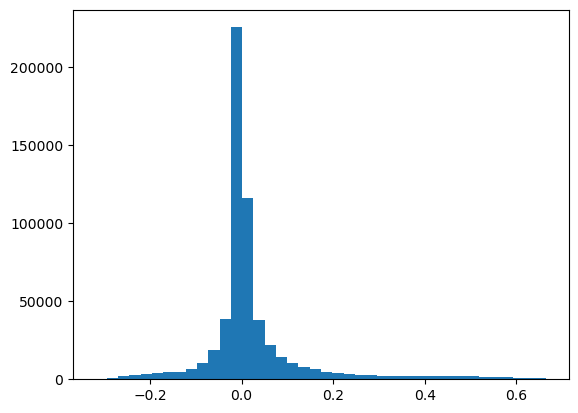

In [209]:
plt.hist([s/t for s, t in stats], bins=40)